In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar
import numpy as np

In [2]:
df=pd.read_csv('Datacleaned.csv')
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
0,Fazilka,Abohar,Other,Cereals,1000.0,2130.0,2130,2130,2023-05-26,2023,May
1,Fazilka,Abohar,Other,Cereals,1360.0,2125.0,2125,2125,2023-05-25,2023,May
2,Fazilka,Abohar,Other,Cereals,2560.0,2125.0,2130,2125,2023-05-24,2023,May
3,Fazilka,Abohar,Other,Cereals,2700.0,2125.0,2130,2125,2023-05-23,2023,May
4,Fazilka,Abohar,Other,Cereals,4740.0,2125.0,2130,2125,2023-05-22,2023,May


In [3]:
df=df[df['District Name'].isin(['Nawanshahr', 'Patiala', 'Ropar (Rupnagar)', 'Sangrur'])]
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
250,Sangrur,Amargarh,Other,Cereals,1000.0,2125.0,2125,2125,2023-05-30,2023,May
251,Sangrur,Amargarh,Other,Cereals,750.0,2125.0,2125,2125,2023-05-29,2023,May
252,Sangrur,Amargarh,Other,Cereals,900.0,2125.0,2125,2125,2023-05-28,2023,May
253,Sangrur,Amargarh,Other,Cereals,11000.0,2125.0,2125,2125,2023-05-18,2023,May
254,Sangrur,Amargarh,Other,Cereals,13600.0,2125.0,2125,2125,2023-05-17,2023,May


In [109]:
class Visualization:

    def __init__(self, df):
        self.df=df


    def line_plot_district_wise(self, target, years, market=None, district=None):
        plt.figure(figsize=(10, 6))
        months = [m for m in calendar.month_name if m]
        
        for year in years:
            
            if market:
                df = self.df[(self.df['Market Name'] == market) & (self.df['Year'] == year)]
                district=market
            else:
                df = self.df[(self.df['District Name'] == district) & (self.df['Year'] == year)]
                
            
            targ_list = []
            for month in months:
                df2 = df[df['Month'] == month]
                if target=='Arrivals (Quintal)':
                    eval=df2[target].sum()
                else:
                    eval=df2[target].median()
                    
                if pd.isna(eval):
                    eval=0
                targ_list.append(eval)
            plt.plot(months, targ_list, marker='o', linestyle='-', label=year)
        
        plt.title(f"{target} Trend in {district} ")
        plt.xlabel("Month")
        plt.ylabel(target)
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def bar_plot_with_market_and_price(self, target, years, district = None):
        if district:
            df=self.df[self.df['District Name']==district]
        else:
            df=self.df
        plt.figure(figsize=(12,6))
        for year in years:
            df2 = df[df['Year']==year]
            group=df2.groupby('Market Name')[target].median()
            plt.bar(group.index, group.values, label=str(year))
        
        plt.xticks(rotation=75)
        plt.xlabel("Market Name")
        plt.ylabel(target)
        plt.legend()
        plt.show()


    def bar_plot_varieties(self, years, target, district=None):
        if district:
            df=self.df[self.df['District Name']==district]
        else:
            df=self.df
        plt.figure(figsize=(14,8))
        for year in years:
            df2=df[df['Year']==year]
            sns.lineplot(x='Variety', y=target, data=df2, markers=True, label=str(year))
        plt.legend(title='Year')
        plt.title(f"Variety trend for {target}")
        plt.show()


    def violin_plot_variety(self, target, distribution_of, years=[2021, 2022, 2023], district=None):
        plt.figure(figsize=(12,8))
        if district:
            df=self.df[self.df['District Name']==district]
        else:
            df=self.df
        df2=df[df['Year'].isin(years)]
        sns.violinplot(x=distribution_of, y=target, data=df2)
        plt.title(f"Violin plots of {distribution_of} with {target}")
        plt.xlabel(distribution_of)
        plt.ylabel(target)
        plt.xticks(rotation=60)
        plt.show()
            
      

vc=Visualization(df)

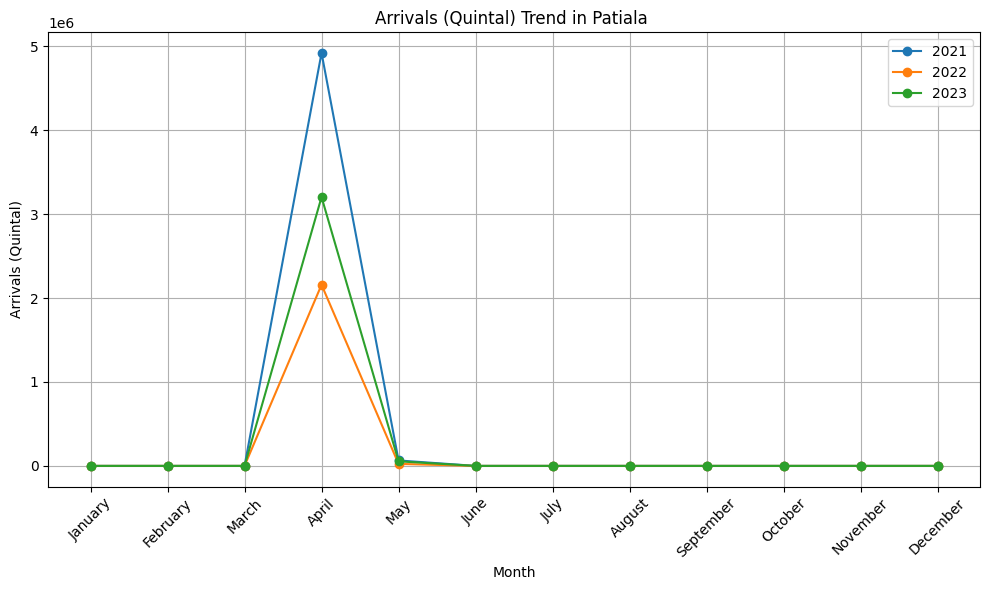

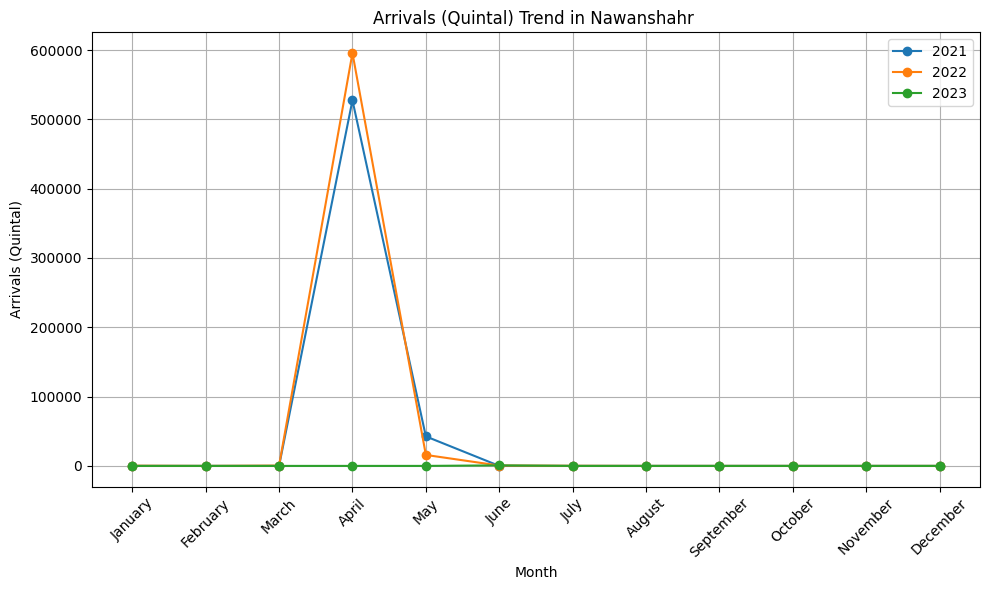

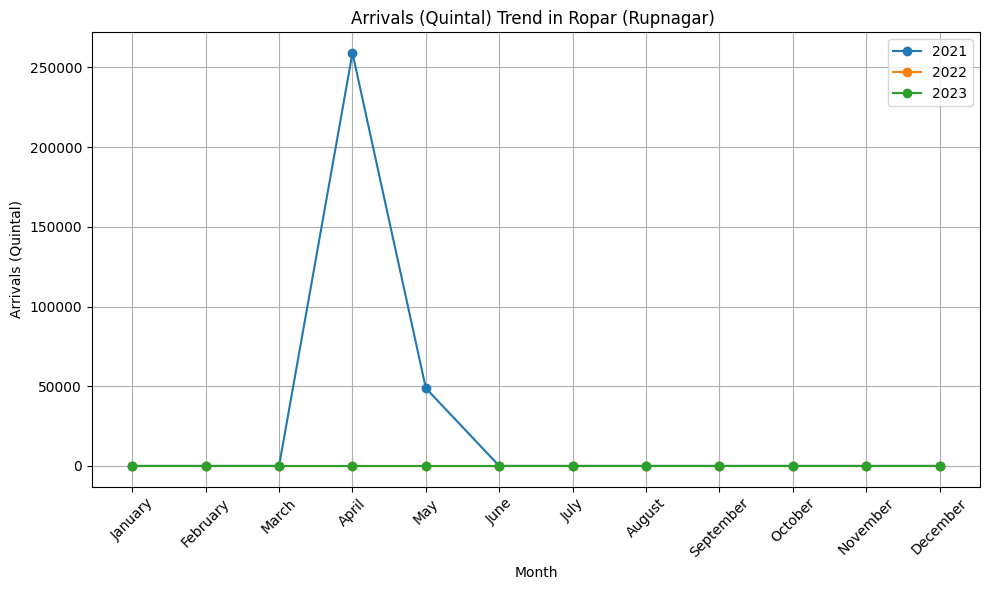

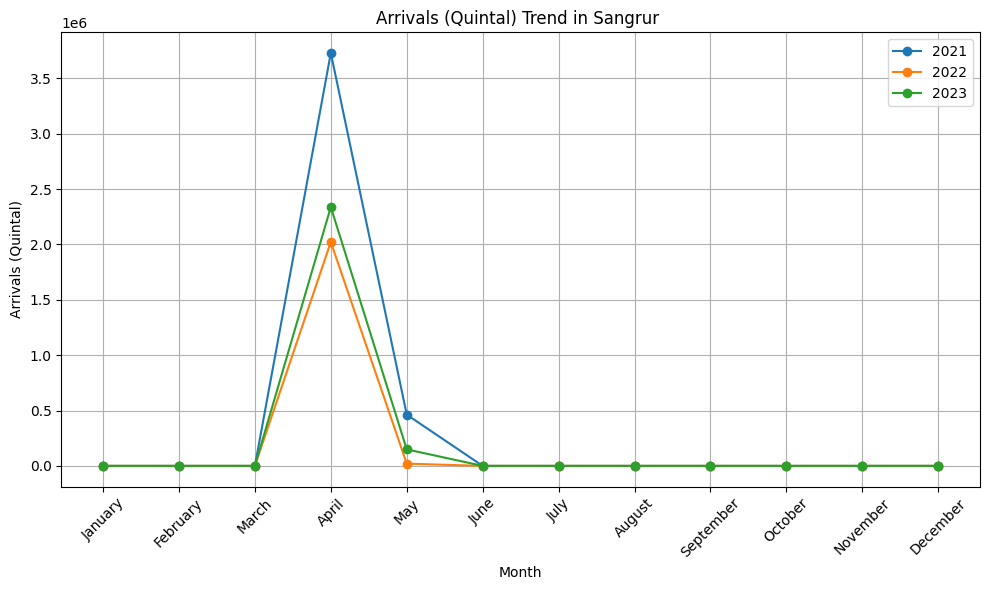

In [90]:
vc.line_plot_district_wise('Arrivals (Quintal)', [2021,2022,2023],district='Patiala')
vc.line_plot_district_wise('Arrivals (Quintal)', [2021,2022,2023], district='Nawanshahr')
vc.line_plot_district_wise('Arrivals (Quintal)', [2021,2022,2023], district='Ropar (Rupnagar)')
vc.line_plot_district_wise('Arrivals (Quintal)', [2021,2022,2023], district='Sangrur')

**1. From the above plots, it is clear that except for Nawanshahr district, Arrivals Quanity is lower than it was in 2021.**

**2. Also we can observe that the wheat harvesting is taking place in Punjab from April to May**

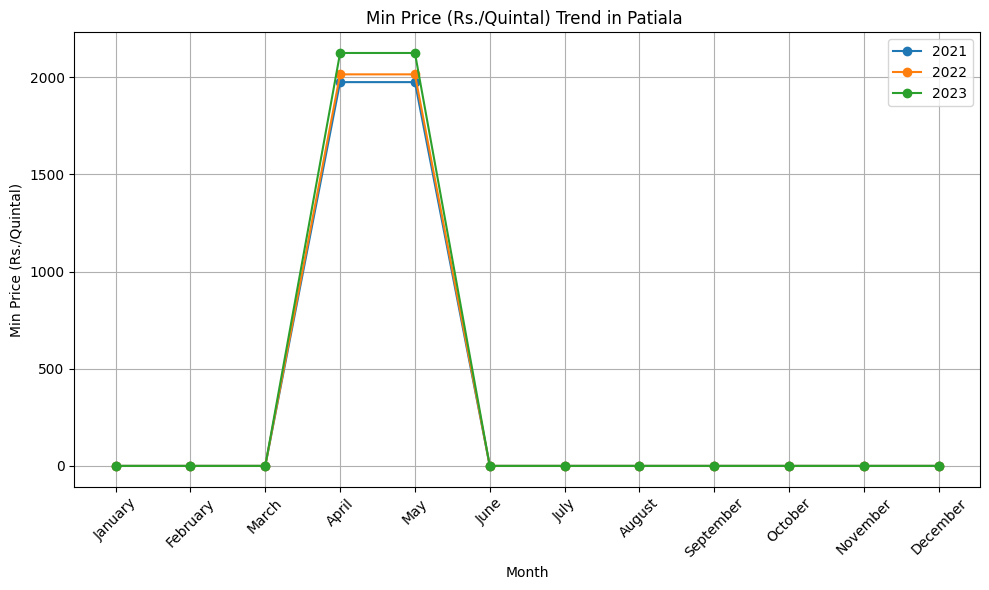

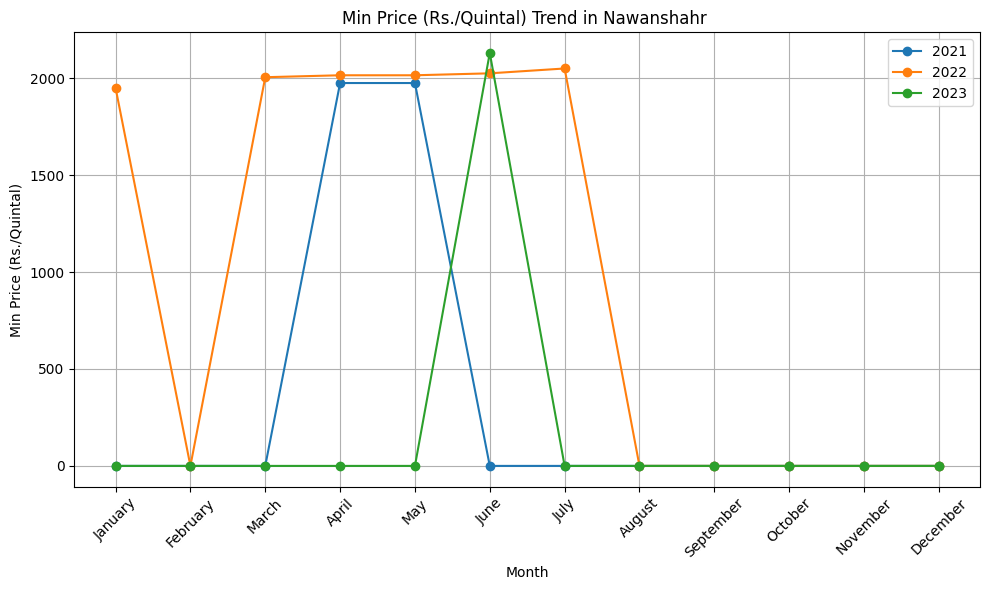

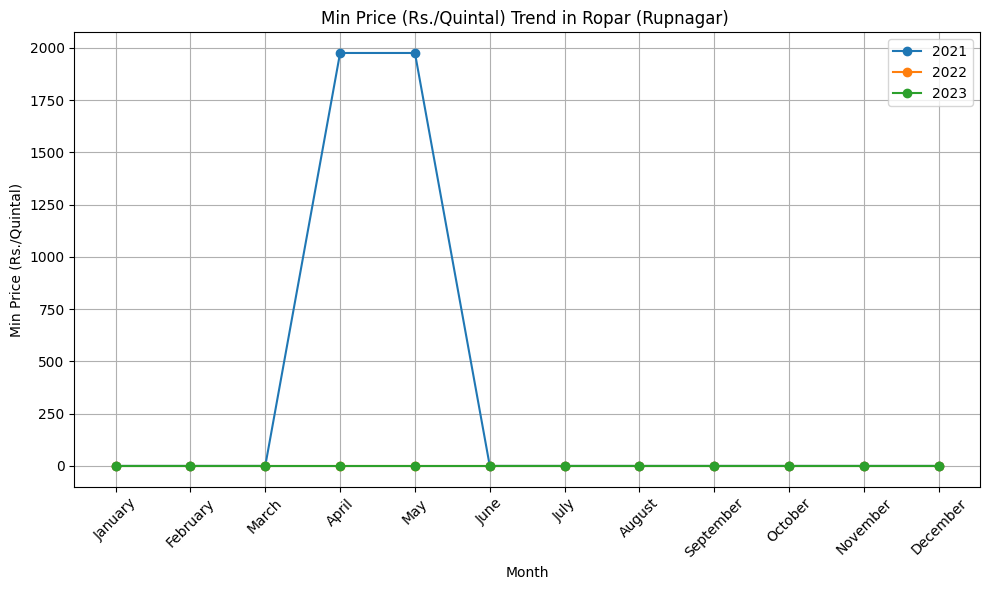

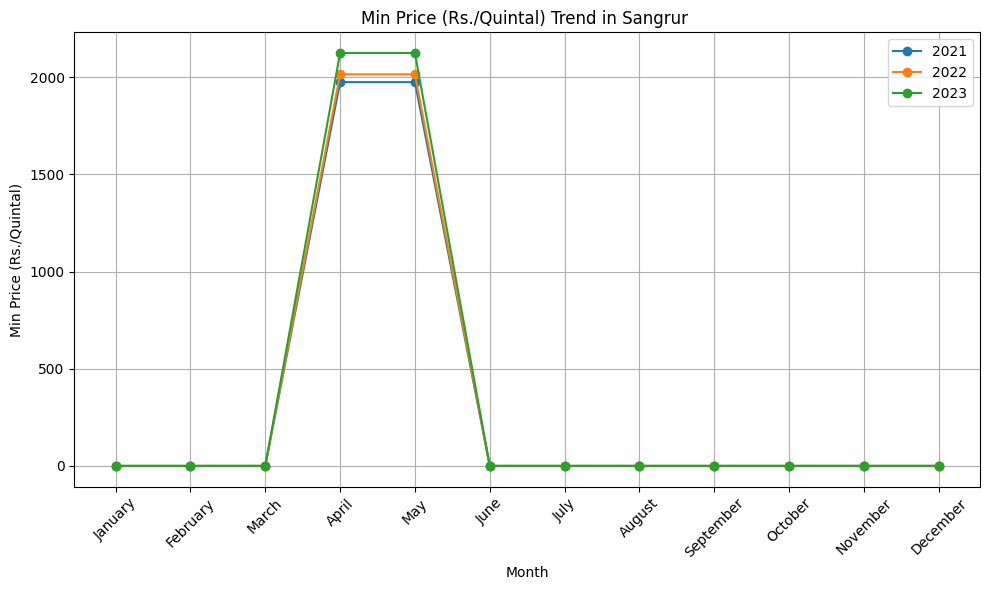

In [111]:
vc.line_plot_district_wise('Min Price (Rs./Quintal)', [2021,2022,2023],district='Patiala')
vc.line_plot_district_wise('Min Price (Rs./Quintal)', [2021,2022,2023], district='Nawanshahr')
vc.line_plot_district_wise('Min Price (Rs./Quintal)', [2021,2022,2023], district='Ropar (Rupnagar)')
vc.line_plot_district_wise('Min Price (Rs./Quintal)', [2021,2022,2023], district='Sangrur')

**1. For the district Nawanshahr, minimum price is considerably high in January,from March to July (2022)**



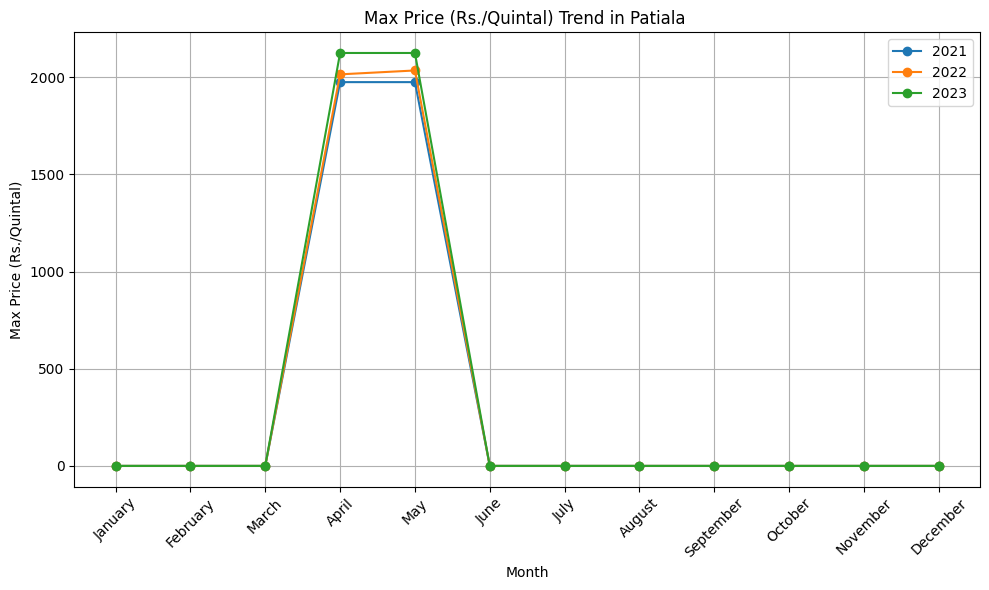

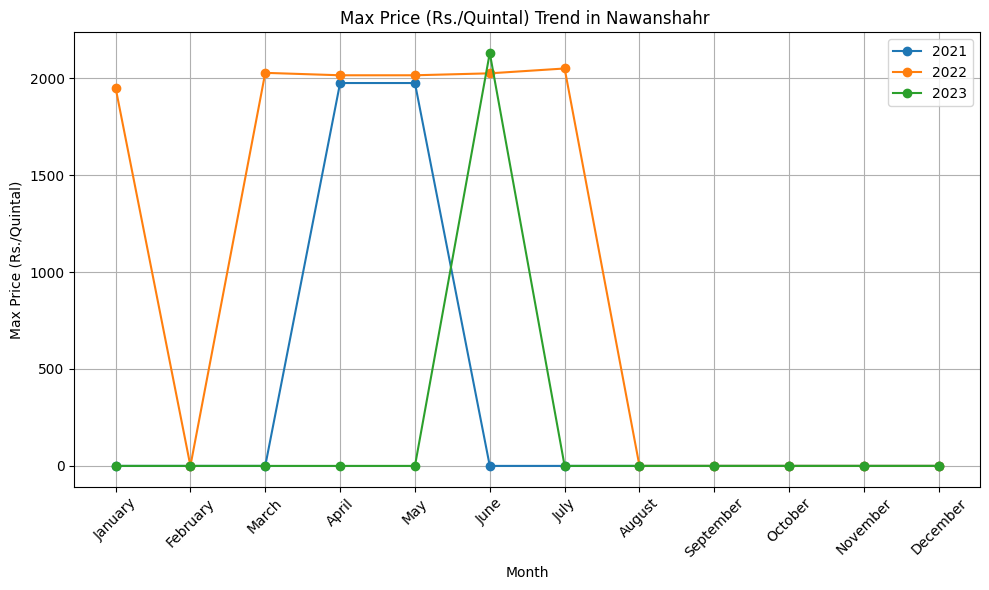

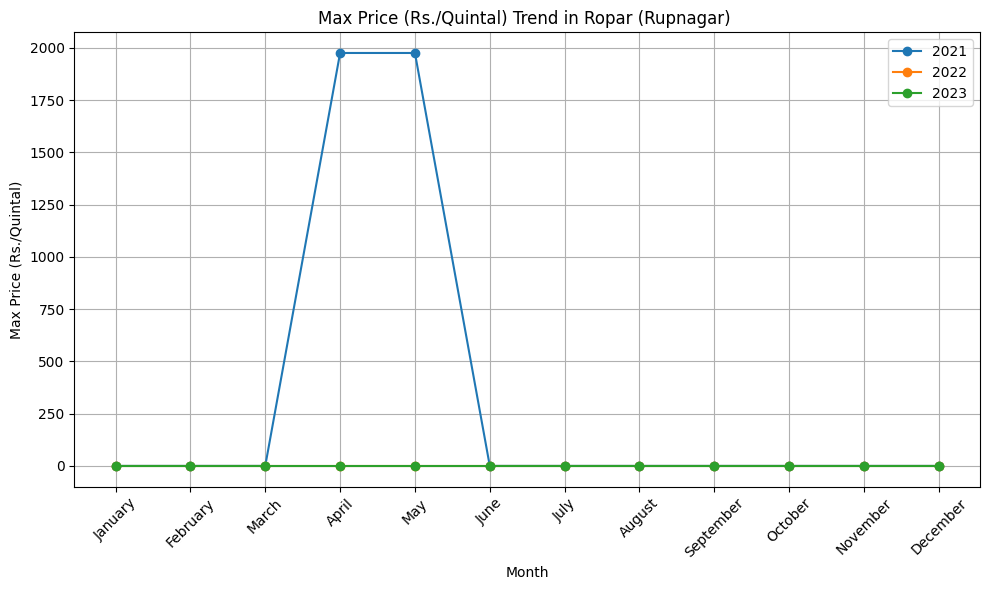

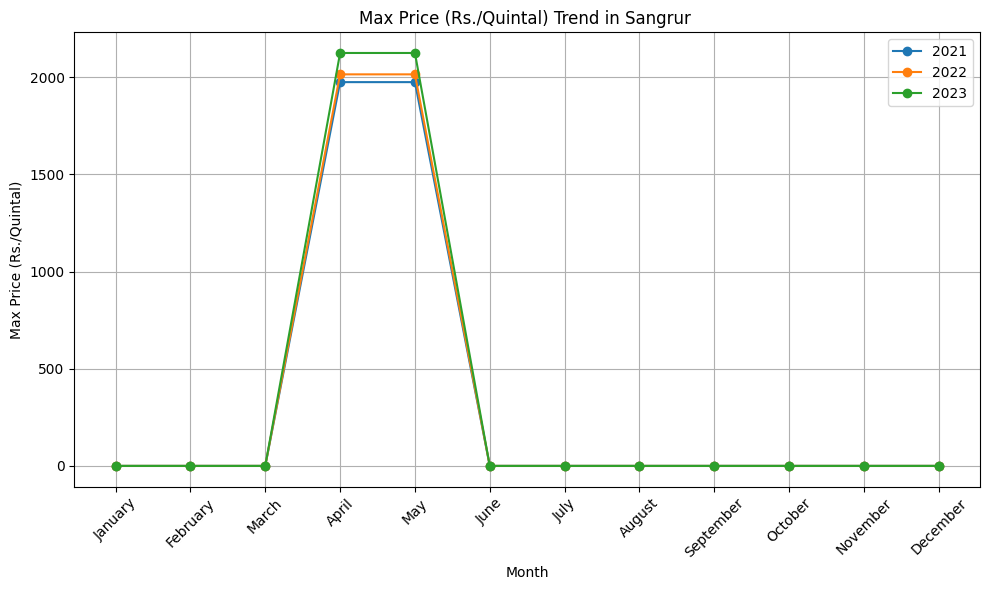

In [92]:
vc.line_plot_district_wise('Max Price (Rs./Quintal)', [2021,2022,2023],district='Patiala')
vc.line_plot_district_wise('Max Price (Rs./Quintal)', [2021,2022,2023], district='Nawanshahr')
vc.line_plot_district_wise('Max Price (Rs./Quintal)', [2021,2022,2023], district='Ropar (Rupnagar)')
vc.line_plot_district_wise('Max Price (Rs./Quintal)', [2021,2022,2023], district='Sangrur')



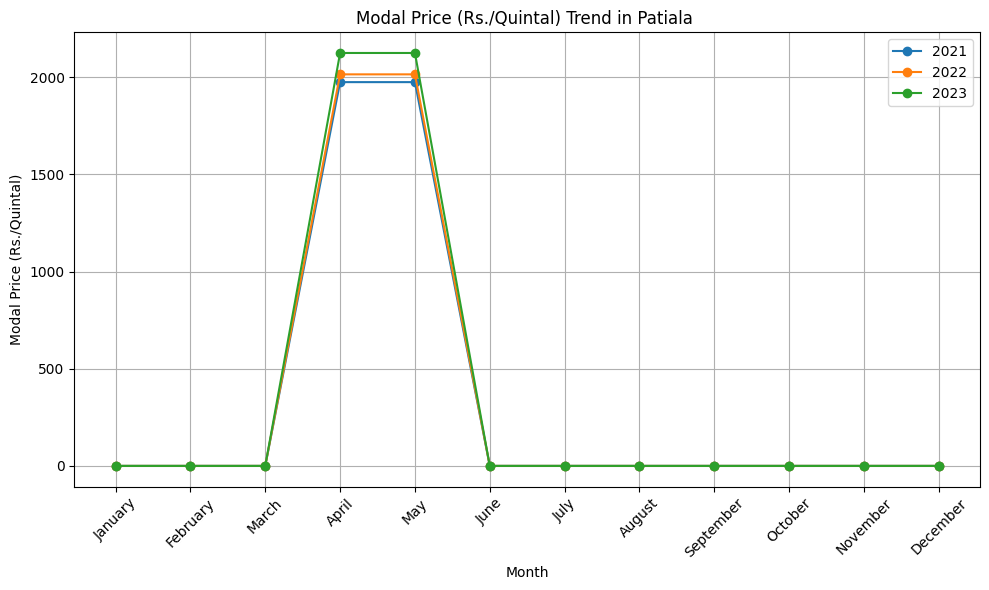

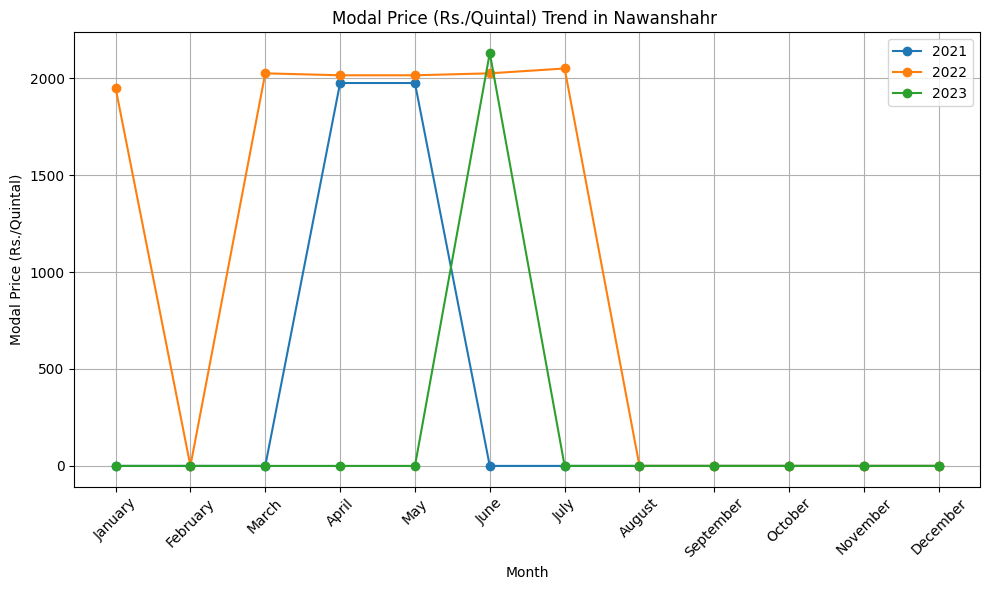

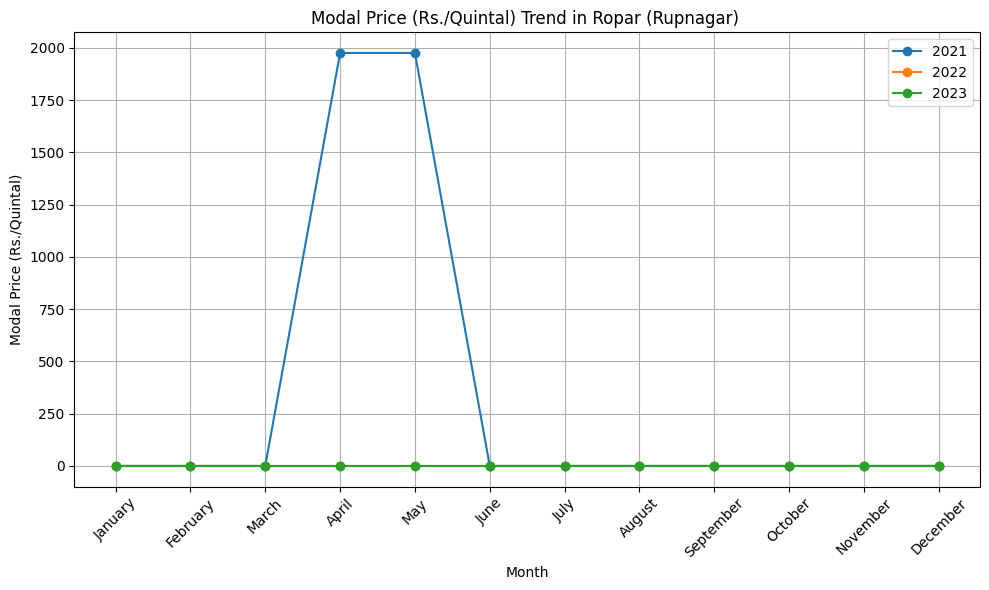

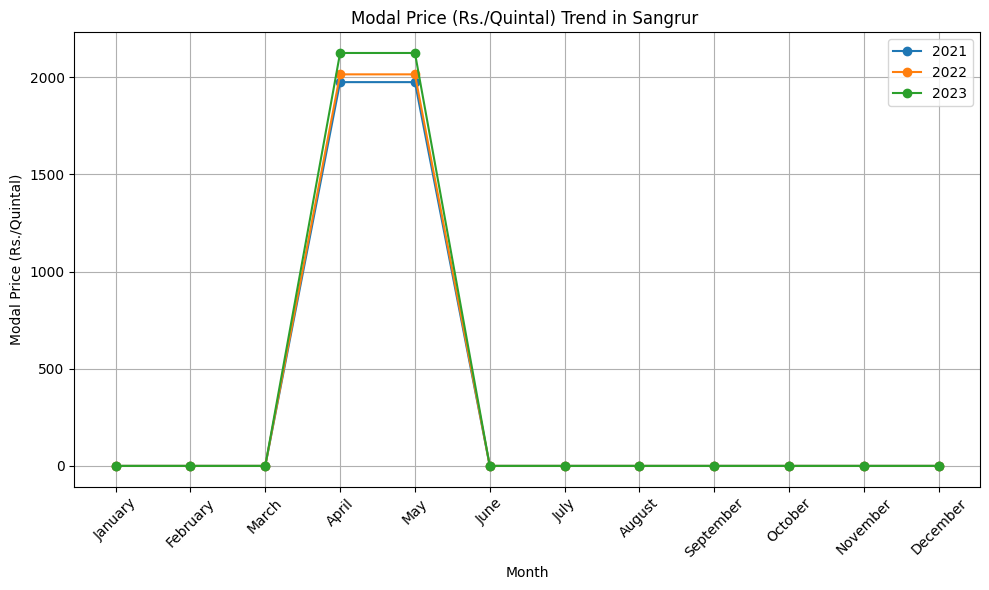

In [93]:
vc.line_plot_district_wise('Modal Price (Rs./Quintal)', [2021,2022,2023],district='Patiala')
vc.line_plot_district_wise('Modal Price (Rs./Quintal)', [2021,2022,2023], district='Nawanshahr')
vc.line_plot_district_wise('Modal Price (Rs./Quintal)', [2021,2022,2023], district='Ropar (Rupnagar)')
vc.line_plot_district_wise('Modal Price (Rs./Quintal)', [2021,2022,2023], district='Sangrur')

In [94]:
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
250,Sangrur,Amargarh,Other,Cereals,1000.0,2125.0,2125,2125,2023-05-30,2023,May
251,Sangrur,Amargarh,Other,Cereals,750.0,2125.0,2125,2125,2023-05-29,2023,May
252,Sangrur,Amargarh,Other,Cereals,900.0,2125.0,2125,2125,2023-05-28,2023,May
253,Sangrur,Amargarh,Other,Cereals,11000.0,2125.0,2125,2125,2023-05-18,2023,May
254,Sangrur,Amargarh,Other,Cereals,13600.0,2125.0,2125,2125,2023-05-17,2023,May


In [95]:
df['Variety'].unique()

array(['Other', '147 Average', 'Local', 'Medium', 'Hybrid', 'Super Fine'],
      dtype=object)

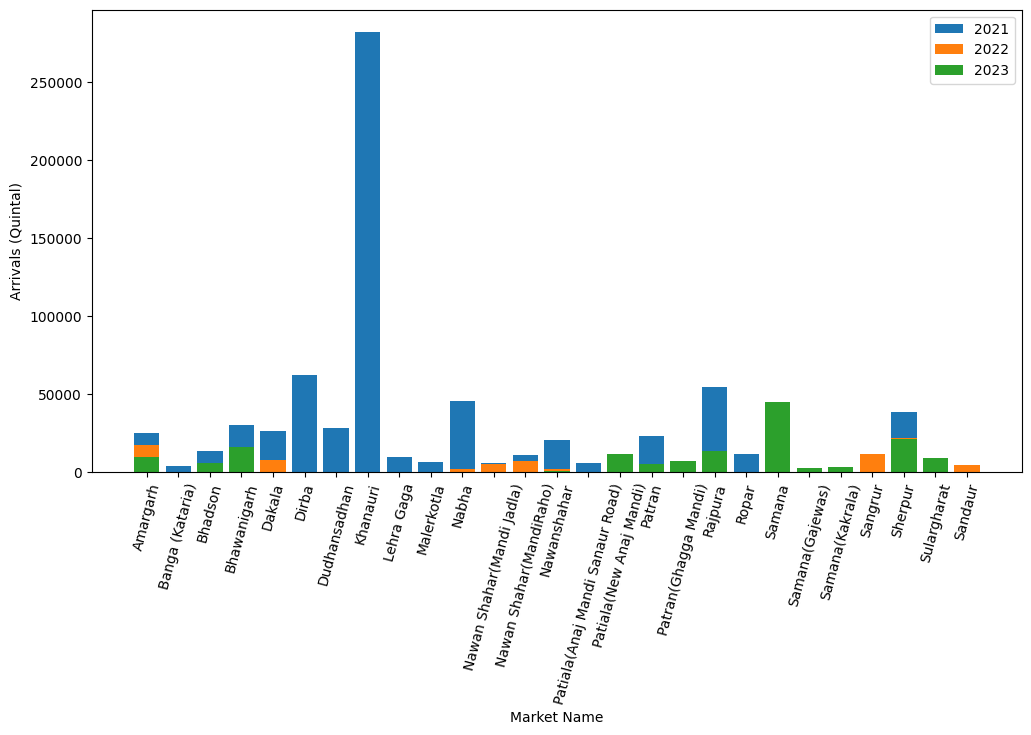

In [110]:
vc.bar_plot_with_market_and_price('Arrivals (Quintal)', [2021, 2022, 2023])

**In 2021 Khanauri market has arrived large quanity of wheat**

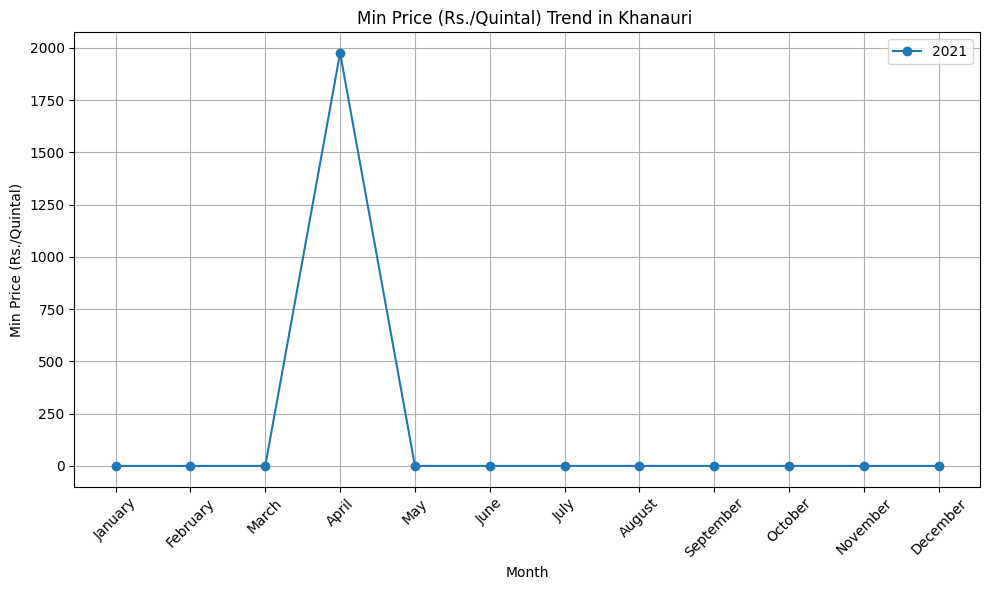

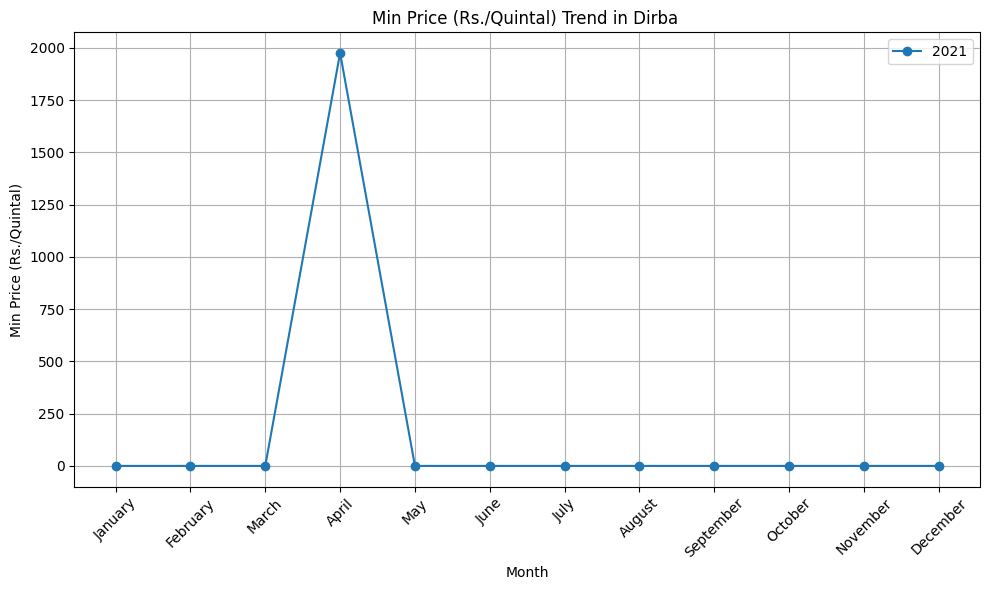

In [97]:
vc.line_plot_district_wise(target='Min Price (Rs./Quintal)', years=[2021], market='Khanauri')
vc.line_plot_district_wise(target='Min Price (Rs./Quintal)', years=[2021], market='Dirba')

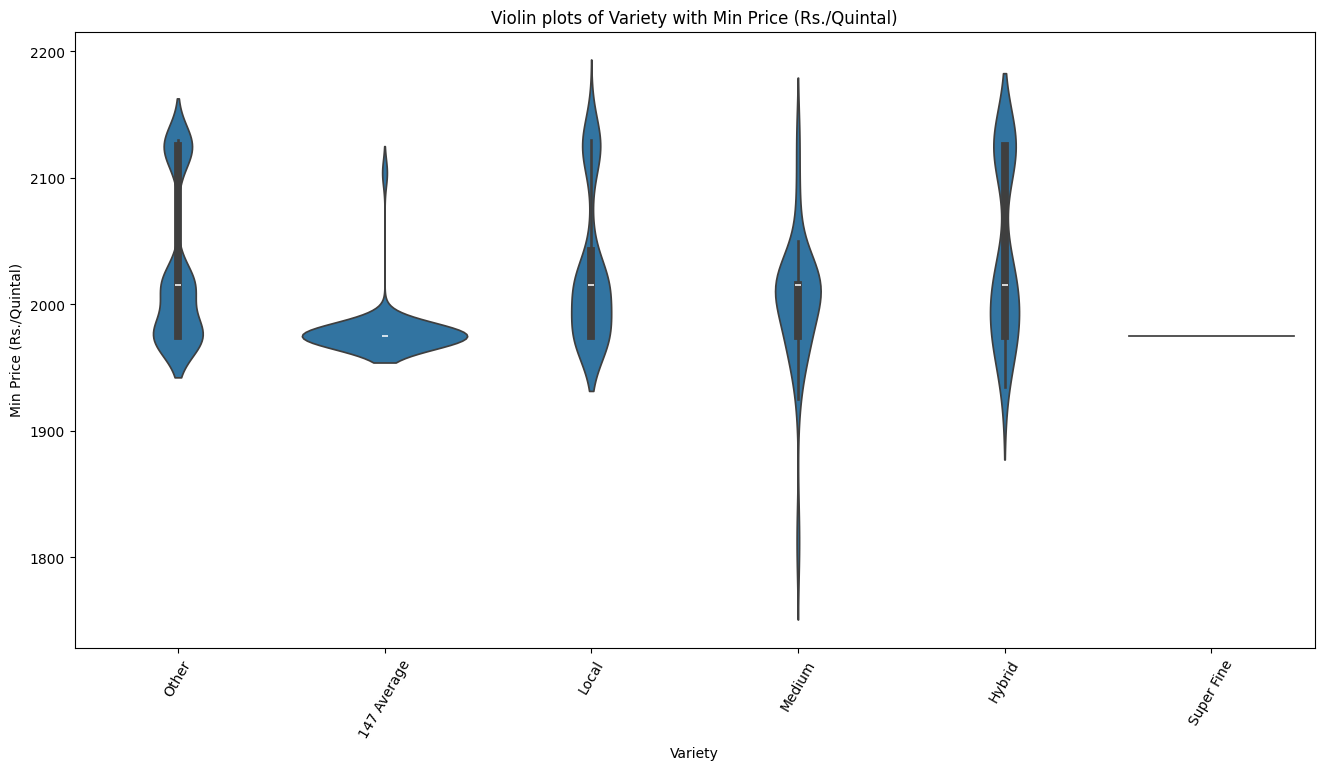

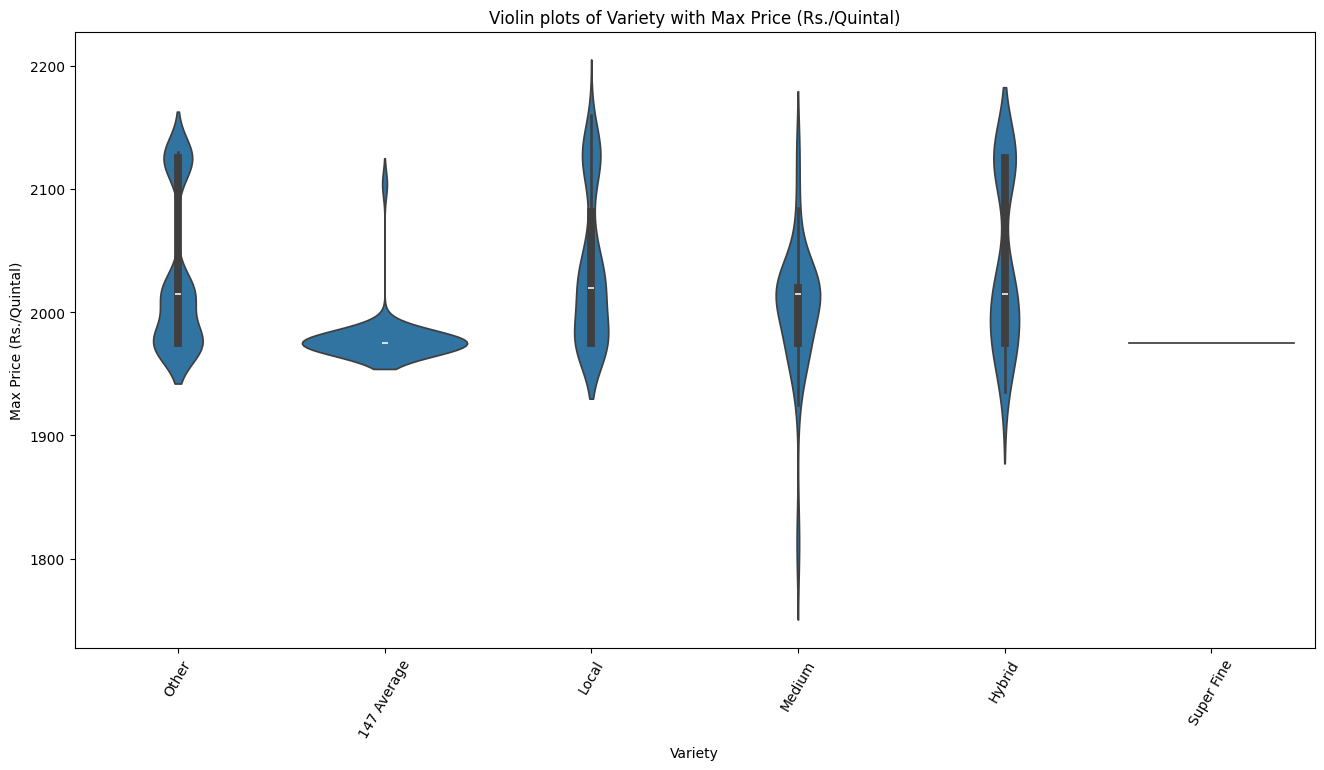

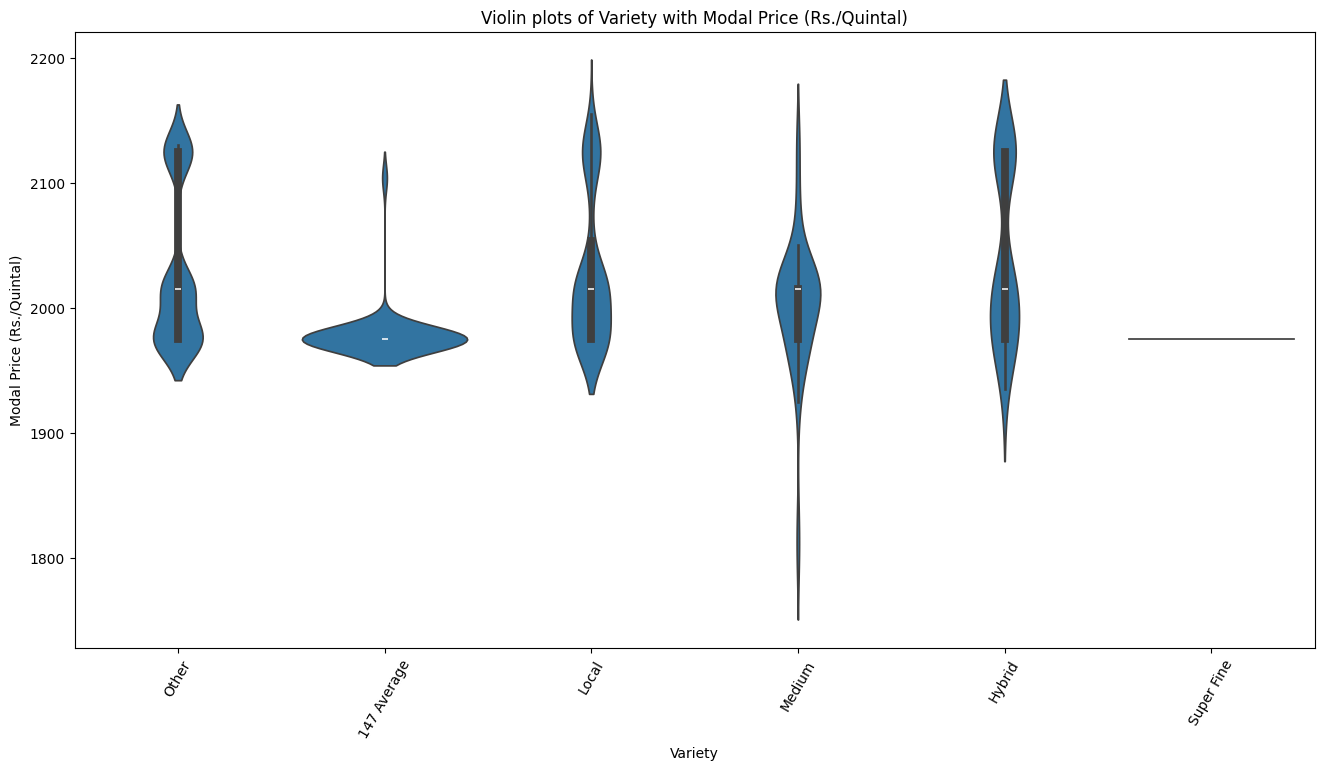

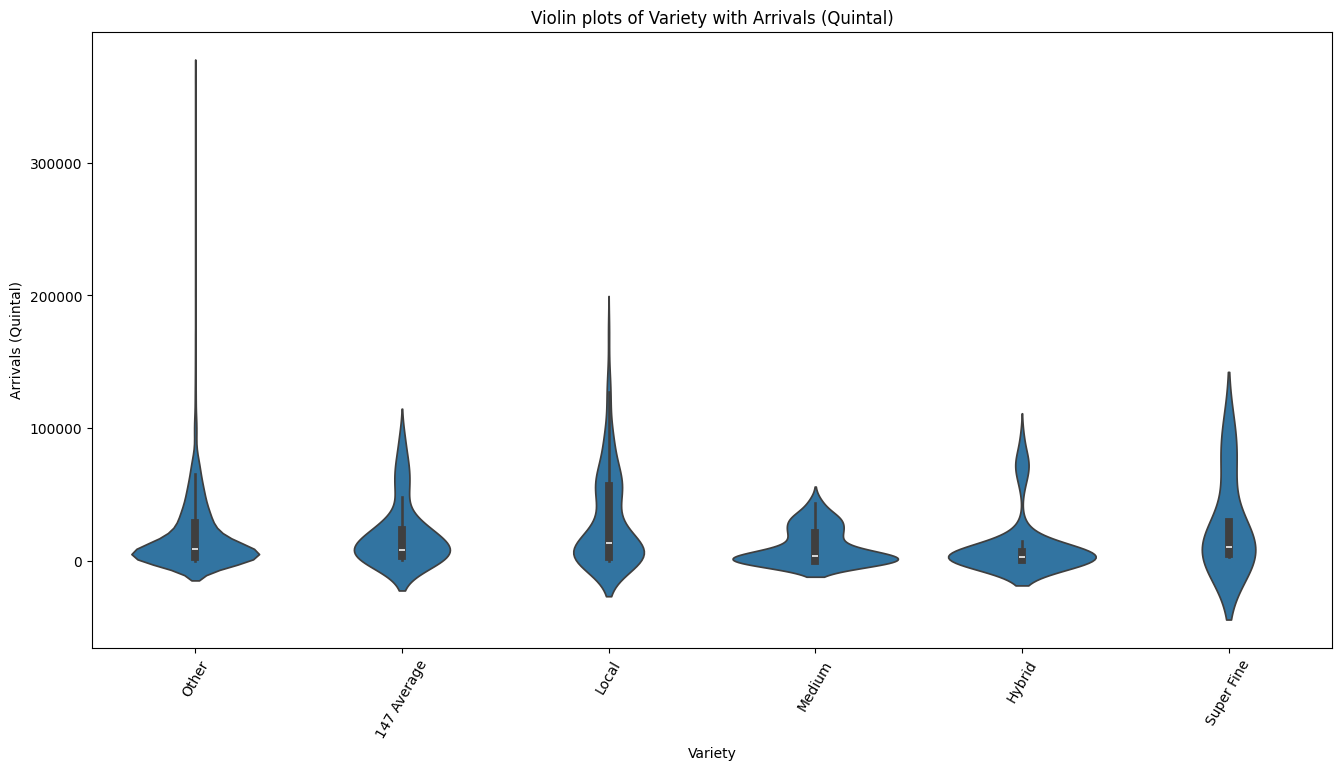

In [98]:
vc.violin_plot_variety('Min Price (Rs./Quintal)', 'Variety')
vc.violin_plot_variety('Max Price (Rs./Quintal)', 'Variety')
vc.violin_plot_variety('Modal Price (Rs./Quintal)', 'Variety')
vc.violin_plot_variety('Arrivals (Quintal)', 'Variety')


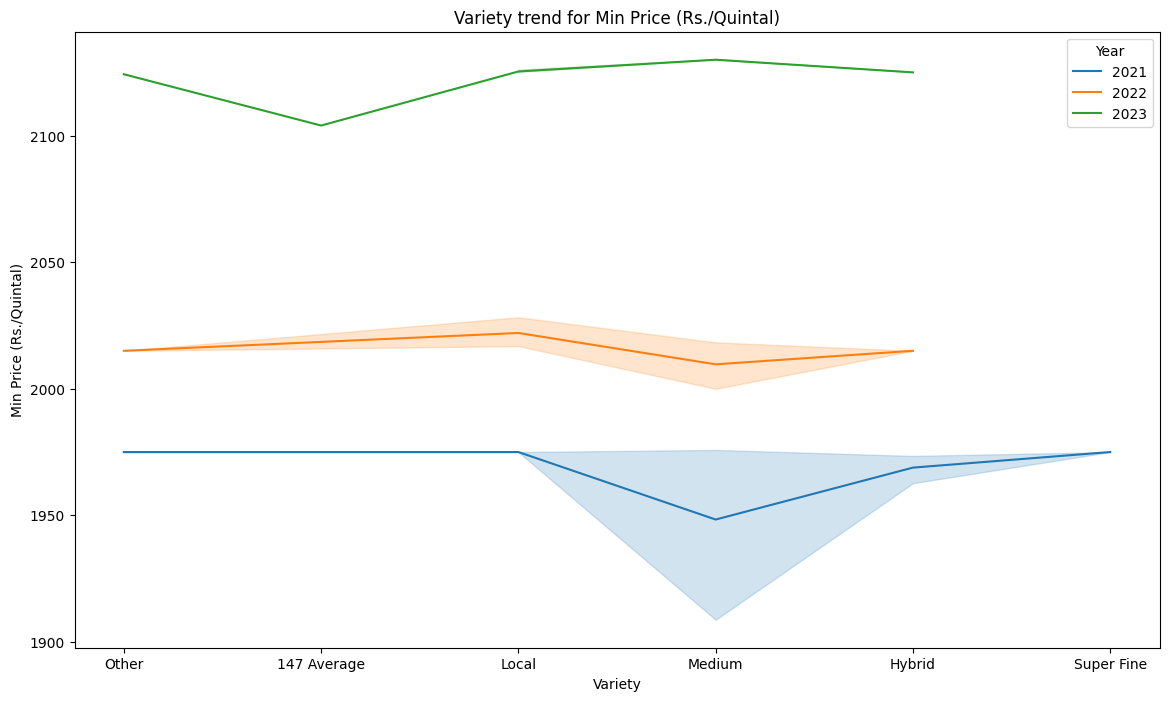

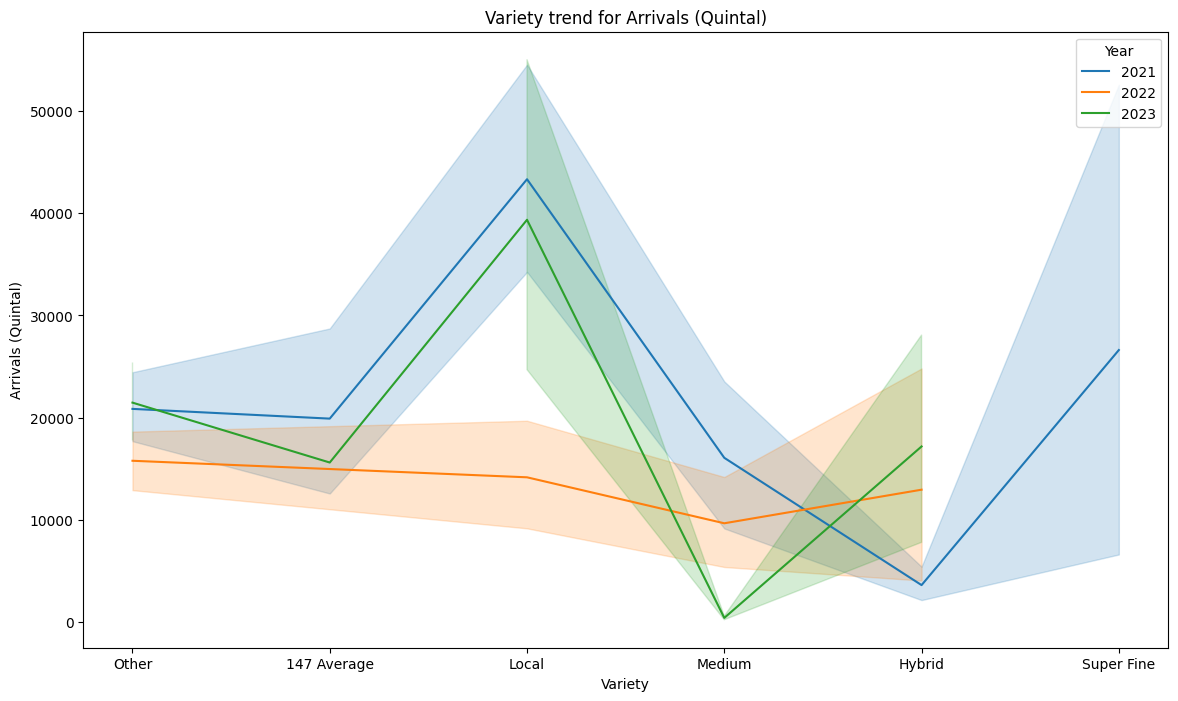

In [113]:
vc.bar_plot_varieties([2021, 2022, 2023], 'Min Price (Rs./Quintal)')
vc.bar_plot_varieties([2021, 2022, 2023], 'Arrivals (Quintal)')

In [115]:
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
250,Sangrur,Amargarh,Other,Cereals,1000.0,2125.0,2125,2125,2023-05-30,2023,May
251,Sangrur,Amargarh,Other,Cereals,750.0,2125.0,2125,2125,2023-05-29,2023,May
252,Sangrur,Amargarh,Other,Cereals,900.0,2125.0,2125,2125,2023-05-28,2023,May
253,Sangrur,Amargarh,Other,Cereals,11000.0,2125.0,2125,2125,2023-05-18,2023,May
254,Sangrur,Amargarh,Other,Cereals,13600.0,2125.0,2125,2125,2023-05-17,2023,May


In [118]:
# sns.lineplot(x='Arrivals (Quintal)', y='Max Price (Rs./Quintal)', data =df, hue='Year')